In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import glob, os
import datetime
%matplotlib inline

In [2]:
# load the dataframe
df = pickle.load(open("../../../full_dataset.p", "rb"))
df.head()

,Time,r.ankle Acceleration X (m/s^2),r.ankle Acceleration Y (m/s^2),r.ankle Acceleration Z (m/s^2),r.ankle Angular Velocity X (rad/s),r.ankle Angular Velocity Y (rad/s),r.ankle Angular Velocity Z (rad/s),r.ankle Magnetic Field X (uT),r.ankle Magnetic Field Y (uT),r.ankle Magnetic Field Z (uT),...,waist Acceleration Z (m/s^2),waist Angular Velocity X (rad/s),waist Angular Velocity Y (rad/s),waist Angular Velocity Z (rad/s),waist Magnetic Field X (uT),waist Magnetic Field Y (uT),waist Magnetic Field Z (uT),FileName,Subject,Trial Type
0,1304800928031250,-9.648093,0.206606,-1.777426,0.216083,0.063081,-0.005750,47.273368,1.812345,-27.669959,...,-1.053796,0.135293,1.125933,0.018840,49.654900,8.159189,-17.617632,AXR_DS_trial2.xlsx,1,ADLs
1,1304800928039060,-9.655078,0.219942,-1.777401,0.227556,0.058676,-0.002446,48.237493,1.805990,-27.652304,...,-1.058562,0.132575,1.117229,-0.005143,49.374396,2.664285,-13.216835,AXR_DS_trial2.xlsx,1,ADLs
2,1304800928046870,-9.666369,0.217904,-1.775162,0.220937,0.056821,-0.002510,48.236490,2.294880,-27.674015,...,-1.056206,0.147104,1.124629,0.006897,42.058388,2.428012,-13.081406,AXR_DS_trial2.xlsx,1,ADLs
3,1304800928054680,-9.666307,0.213494,-1.772938,0.221138,0.054895,-0.008760,48.236490,2.294880,-27.674015,...,-1.037325,0.140787,1.117659,-0.005121,42.058388,2.428012,-13.081406,AXR_DS_trial2.xlsx,1,ADLs
4,1304800928062500,-9.664132,0.220071,-1.779620,0.222743,0.056661,-0.007188,47.761448,1.450496,-27.925828,...,-1.025526,0.123733,1.120609,0.018782,52.773543,7.563286,-15.440793,AXR_DS_trial2.xlsx,1,ADLs


In [3]:
# Load metadata (file genenerated in notebook exploratory_data_analysis)
meta = pickle.load(open("../../../metadata.p", "rb"))
meta_acceletarion = list(meta[meta.measure=='acceleration'].index)

## Including implicit features

In [4]:
df = df.rename(columns={"Trial Type": "trial_type","Subject" : "subject"})
df['trial_type'].value_counts()

ADLs          498810
Falls         403402
Near_Falls    288157
Name: trial_type, dtype: int64

In [5]:
# 'Trial Type' is not ordinal, so we will need dummy variables

# extraction of the trial number from the file name
# Not Ordinal: necessary dummy variables
df['trial_num'] = df['FileName'].apply(lambda x: x.replace('.xlsx','').split('_')[-1])

# extraction of the trial subtype (slip, trip, pick object from ground, etc) from the file name
# Necessary dummy variables
df['trial_subtype'] = df['FileName'].apply(lambda x: x.split('_')[1])

# column with the real date and time of the measurement
# according to the README.txt, the Time column is the number of microseconds from 01/01/1970
initial = datetime.datetime(1970,1,1,0,0,0)
df['time_datetime'] = df.Time.apply(lambda x: (initial + datetime.timedelta(microseconds=x)))
# creating the column 'Time_datetime' in a pandas datetime format
df['time_datetime'] = df.time_datetime.apply(lambda t: pd.datetime(t.year,t.month,t.day,t.hour,t.minute,t.second,t.microsecond))

###### The first 3 characters of the file name seems to be a supercategory of the trial_subtype.
###### This way, I believe we can discard it and use just trial_subtype
df['target'] = np.where(df['trial_type'] == 'Falls', 1, 0)
df.head()

,Time,r.ankle Acceleration X (m/s^2),r.ankle Acceleration Y (m/s^2),r.ankle Acceleration Z (m/s^2),r.ankle Angular Velocity X (rad/s),r.ankle Angular Velocity Y (rad/s),r.ankle Angular Velocity Z (rad/s),r.ankle Magnetic Field X (uT),r.ankle Magnetic Field Y (uT),r.ankle Magnetic Field Z (uT),...,waist Magnetic Field X (uT),waist Magnetic Field Y (uT),waist Magnetic Field Z (uT),FileName,subject,trial_type,trial_num,trial_subtype,time_datetime,target
0,1304800928031250,-9.648093,0.206606,-1.777426,0.216083,0.063081,-0.005750,47.273368,1.812345,-27.669959,...,49.654900,8.159189,-17.617632,AXR_DS_trial2.xlsx,1,ADLs,trial2,DS,2011-05-07 20:42:08.031250,0
1,1304800928039060,-9.655078,0.219942,-1.777401,0.227556,0.058676,-0.002446,48.237493,1.805990,-27.652304,...,49.374396,2.664285,-13.216835,AXR_DS_trial2.xlsx,1,ADLs,trial2,DS,2011-05-07 20:42:08.039060,0
2,1304800928046870,-9.666369,0.217904,-1.775162,0.220937,0.056821,-0.002510,48.236490,2.294880,-27.674015,...,42.058388,2.428012,-13.081406,AXR_DS_trial2.xlsx,1,ADLs,trial2,DS,2011-05-07 20:42:08.046870,0
3,1304800928054680,-9.666307,0.213494,-1.772938,0.221138,0.054895,-0.008760,48.236490,2.294880,-27.674015,...,42.058388,2.428012,-13.081406,AXR_DS_trial2.xlsx,1,ADLs,trial2,DS,2011-05-07 20:42:08.054680,0
4,1304800928062500,-9.664132,0.220071,-1.779620,0.222743,0.056661,-0.007188,47.761448,1.450496,-27.925828,...,52.773543,7.563286,-15.440793,AXR_DS_trial2.xlsx,1,ADLs,trial2,DS,2011-05-07 20:42:08.062500,0


In [6]:
# Subtypes of trial
df.trial_subtype.value_counts()

HB      115264
slip    115264
ITRS    115263
trip    115260
CS      103718
DS       76832
AS       76192
ITDS     57633
POG      57633
SQ       57631
DSL      57631
NW       57631
LCC      57631
RSS      57630
DSS      57630
ITCS     11526
Name: trial_subtype, dtype: int64

# Approach 1 - **NOT** grouping data in 2.5-second windows

### Example of a graph, similar to the ones in the paper

#### OBS: Here there is one trial (trial1), from Subject 1, subtype 'slip' from the Fall dataset

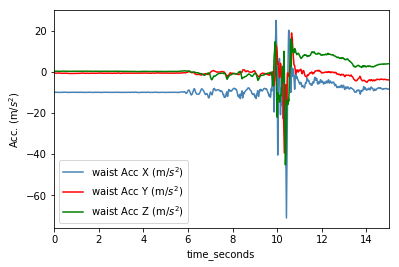

In [7]:
subtype = 'slip'
trial = 'trial1'
subject = 1
trial_type = 'Falls'
df_graph = df[(df.trial_subtype == subtype) & 
              (df.trial_num == trial) &
              (df.subject == subject) &
              (df['trial_type'] == trial_type)
             ][['Time']+meta_acceletarion]

initial_time = df_graph.Time.min()
# Setting the time in seconds and restart the time counting from the first measeure of this trial
df_graph['time_seconds'] = df_graph.Time.apply(lambda x: (x-initial_time)/1000000)

fig, ax = plt.subplots()
df_graph.set_index('time_seconds')['waist Acceleration X (m/s^2)'].plot(color='steelblue', ax=ax, label='waist Acc X (m/$s^2$)')
df_graph.set_index('time_seconds')['waist Acceleration Y (m/s^2)'].plot(color='red',ax=ax, label='waist Acc Y (m/$s^2$)')
df_graph.set_index('time_seconds')['waist Acceleration Z (m/s^2)'].plot(color='green',ax=ax, label='waist Acc Z (m/$s^2$)')
plt.ylabel('Acc. (m/$s^2$)')
ax.legend()

In [8]:
df_graph.shape

(1921, 23)

In [9]:
# Get the data columns and separate them based on the sensor and the feature (accel, vel and magfield)

allcols = df.columns.values

waistcols = []
ranklecols = []
lanklecols = []
rthighcols = []
lthighcols = []
headcols = []
sternumcols = []
accelcols = []
velcols = []
magcols = []

for col in allcols : 
    if 'r.ankle' in col :
        ranklecols.append(col)
    if 'l.ankle' in col :
        lanklecols.append(col)
    if 'waist' in col :
        waistcols.append(col)
    if 'r.thigh' in col :
        rthighcols.append(col)
    if 'l.thigh' in col :
        lthighcols.append(col)
    if 'head' in col :
        headcols.append(col)
    if 'Velocity' in col :
        velcols.append(col)
    if 'Magnetic' in col :
        magcols.append(col)
    if 'Acceleration' in col :
        accelcols.append(col)

# Approach 2 - Grouping data in 2.5-second windows

### The calc of the aggregation will be the means


## OBS:

1 - I created 2 separated dataframes - one for mean and one for variance

2 - I'm just considering the files with data from the accelerometers


In [10]:
# group in intervals of 2 seconds, calculating the mean
df_2s_window_mean = df.groupby(['subject','trial_type','trial_subtype','trial_num',pd.Grouper(key='time_datetime', freq='2500000us')]).mean()
df_2s_window_mean = df_2s_window_mean.reset_index()

# renaming the acceleration measurement columns, including a '_mean' in the end
for col in accelcols:
    df_2s_window_mean.rename(columns={col: str(col+'_mean')}, inplace=True)

for col in velcols:
    df_2s_window_mean.rename(columns={col: str(col+'_mean')}, inplace=True)
    
for col in magcols:
    df_2s_window_mean.rename(columns={col: str(col+'_mean')}, inplace=True)

In [11]:
# group in intervals of 2 seconds, calculating the variance

df_2s_window_variance = df.groupby(['subject','trial_type','trial_subtype','trial_num',pd.Grouper(key='time_datetime', freq='2500000us')]).var()
df_2s_window_variance = df_2s_window_variance.reset_index()

# renaming the acceleration measurement columns, including a '_variance' in the end

for col in accelcols : 
    df_2s_window_variance.rename(columns={col: str(col+'_variance')}, inplace=True)
    
for col in velcols : 
    df_2s_window_variance.rename(columns={col: str(col+'_variance')}, inplace=True)
    
for col in magcols : 
    df_2s_window_variance.rename(columns={col: str(col+'_variance')}, inplace=True)

In [12]:
# final dataframe, with all accelerometer columns (means and variances)
all_trials = pd.merge(df_2s_window_mean, df_2s_window_variance,on=['subject', 'trial_type', 'trial_subtype', 'trial_num', 'time_datetime'])

all_trials = all_trials.dropna(axis=0, how='any')

In [13]:
# Get the data columns and separate them based on the sensor and the feature (accel, vel and magfield)

allcols = all_trials.columns.values

waistcols = []
ranklecols = []
lanklecols = []
rthighcols = []
lthighcols = []
headcols = []
sternumcols = []
accelcols = []
velcols = []
magcols = []
varcols = []
meancols = []

for col in allcols : 
    if 'r.ankle' in col :
        ranklecols.append(col)
    if 'l.ankle' in col :
        lanklecols.append(col)
    if 'waist' in col :
        waistcols.append(col)
    if 'r.thigh' in col :
        rthighcols.append(col)
    if 'l.thigh' in col :
        lthighcols.append(col)
    if 'head' in col :
        headcols.append(col)
    if 'Velocity' in col :
        velcols.append(col)
    if 'Magnetic' in col :
        magcols.append(col)
    if 'Acceleration' in col :
        accelcols.append(col)
    if 'mean' in col :
        meancols.append(col)
    if 'variance' in col :
        varcols.append(col)

In [64]:
# Using 2 second window with all means/variances for accelerations,velocities and magnetic fields

from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm

X = all_trials.drop(['trial_type', 'subject', 'trial_subtype', 'trial_num', 'time_datetime'], axis=1)
y = all_trials['trial_type'].values
le = LabelEncoder()
le.fit(['ADLs', 'Falls', 'Near_Falls'])
y = le.transform(y)
v = DictVectorizer(sparse=False)
X = X.values
for i in range(len(y)) :
    if y[i] == 1 :
        y[i] = 0
    if y[i] == 2 :
        y[i] = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = svm.SVC(decision_function_shape='ovo', cache_size=500000, coef0=0, C=1, gamma=0.03,  class_weight=None)
clf.fit(X_train, y_train) 
clf.score(X_test, y_test)

0.75289575289575295

In [63]:
# Using 2 second window with all means/variances for accelerations and velocities

from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
import numpy as np

onlyAccVel = all_trials.drop(magcols,axis=1)
X = onlyAccVel.drop(['trial_type', 'subject', 'trial_subtype', 'trial_num', 'time_datetime'], axis=1)
y = onlyAccVel['trial_type'].values
le = LabelEncoder()
le.fit(['ADLs', 'Falls', 'Near_Falls'])
y = le.transform(y)
v = DictVectorizer(sparse=False)
X = X.values
for i in range(len(y)) :
    if y[i] == 1 :
        y[i] = 0
    if y[i] == 2 :
        y[i] = 1
        
from sklearn.model_selection import train_test_split
from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = svm.SVC(decision_function_shape='ovo', cache_size=500000, coef0=0, C=1, gamma=0.03,  class_weight=None)
clf.fit(X_train, y_train) 
clf.score(X_test, y_test)

0.76911196911196911

In [62]:
# Using 2 second window with all means/variances for just velocities
onlyVel = all_trials.drop(magcols+accelcols,axis=1)
X = onlyVel.drop(['trial_type', 'subject', 'trial_subtype', 'trial_num', 'time_datetime'], axis=1)
y = onlyVel['trial_type'].values
le = LabelEncoder()
le.fit(['ADLs', 'Falls', 'Near_Falls'])
y = le.transform(y)
v = DictVectorizer(sparse=False)
X = X.values
for i in range(len(y)) :
    if y[i] == 1 :
        y[i] = 0
    if y[i] == 2 :
        y[i] = 1
    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = svm.SVC(decision_function_shape='ovo', cache_size=500000, coef0=0, C=1, gamma=0.03,  class_weight=None)
clf.fit(X_train, y_train) 
clf.score(X_test, y_test)

0.75444015444015444

In [61]:
# Using 2 second window with all means/variances for just accelerations

onlyAcc = all_trials.drop(magcols+velcols,axis=1)
X = onlyAcc.drop(['trial_type', 'subject', 'trial_subtype', 'trial_num', 'time_datetime'], axis=1)
y = onlyAcc['trial_type'].values
le = LabelEncoder()
le.fit(['ADLs', 'Falls', 'Near_Falls'])
y = le.transform(y)
v = DictVectorizer(sparse=False)
X = X.values
for i in range(len(y)) :
    if y[i] == 1 :
        y[i] = 0
    if y[i] == 2 :
        y[i] = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = svm.SVC(decision_function_shape='ovo', cache_size=500000, coef0=0, C=1, gamma=0.03,  class_weight=None)
clf.fit(X_train, y_train) 
clf.score(X_test, y_test)

0.75057915057915059

### Dataframe with data from **Waist Acceleration**

In [36]:
# get from the metadata dataframe the columns regarding acceleration at waist
acceleration_waist_base = list(meta[(meta.body_location == 'waist') & (meta.measure == 'acceleration')].index)

# generate the list of columns including postfix _mean and _variance 
acceleration_waist = [x+'_mean' for x in acceleration_waist_base]+[x+'_variance' for x in acceleration_waist_base]

columns_base = ['subject', 'trial_type', 'trial_subtype', 'trial_num', 'time_datetime']

# complete list of columns for final dataset
full_columns = columns_base + acceleration_waist
full_columns

['subject',
 'trial_type',
 'trial_subtype',
 'trial_num',
 'time_datetime',
 'waist Acceleration X (m/s^2)_mean',
 'waist Acceleration Y (m/s^2)_mean',
 'waist Acceleration Z (m/s^2)_mean',
 'waist Acceleration X (m/s^2)_variance',
 'waist Acceleration Y (m/s^2)_variance',
 'waist Acceleration Z (m/s^2)_variance']

In [42]:
waist_acceleration_trials = all_trials[waistcols+['trial_type', 'subject', 'trial_subtype', 'trial_num', 'time_datetime']]
waist_acceleration_trials = waist_acceleration_trials.dropna(axis=0, how='any')

In [43]:
# USING JUST THE WAIST TRIALS
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
import numpy as np

X = waist_acceleration_trials.drop(['trial_type', 'subject', 'trial_subtype', 'trial_num', 'time_datetime'], axis=1)
y = waist_acceleration_trials['trial_type'].values
le = LabelEncoder()
le.fit(['ADLs', 'Falls', 'Near_Falls'])
y = le.transform(y)
v = DictVectorizer(sparse=False)
X = X.values
for i in range(len(y)) :
    if y[i] == 1 :
        y[i] = 0
    if y[i] == 2 :
        y[i] = 1

In [44]:
from sklearn.model_selection import train_test_split
from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)
clf = svm.SVC(decision_function_shape='ovo', cache_size=500000, coef0=0, C=1, gamma=0.03,  class_weight=None)
print(clf)
clf.fit(X_train, y_train) 
clf.score(X_test, y_test)

SVC(C=1, cache_size=500000, class_weight=None, coef0=0,
  decision_function_shape='ovo', degree=3, gamma=0.03, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


0.77790652761684043

In [47]:
# USING ALL ACCELERATION TRIALS 
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
import numpy as np

acceleration_trials = all_trials[accelcols + ['trial_type', 'subject', 'trial_subtype', 'trial_num', 'time_datetime']]
acceleration_trials = acceleration_trials.dropna(axis=0, how='any')
X = acceleration_trials.drop(['trial_type', 'subject', 'trial_subtype', 'trial_num', 'time_datetime'], axis=1)
y = acceleration_trials['trial_type'].values
le = LabelEncoder()
le.fit(['ADLs', 'Falls', 'Near_Falls'])
y = le.transform(y)
v = DictVectorizer(sparse=False)
X = X.values
for i in range(len(y)) :
    if y[i] == 1 :
        y[i] = 0
    if y[i] == 2 :
        y[i] = 1

In [48]:
from sklearn.model_selection import train_test_split
from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)
clf = svm.SVC(decision_function_shape='ovo', cache_size=500000, coef0=0, C=1, gamma=0.03,  class_weight=None)
print(clf)
clf.fit(X_train, y_train) 
clf.score(X_test, y_test)

SVC(C=1, cache_size=500000, class_weight=None, coef0=0,
  decision_function_shape='ovo', degree=3, gamma=0.03, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


0.81189648512939361